# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$.

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

**Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

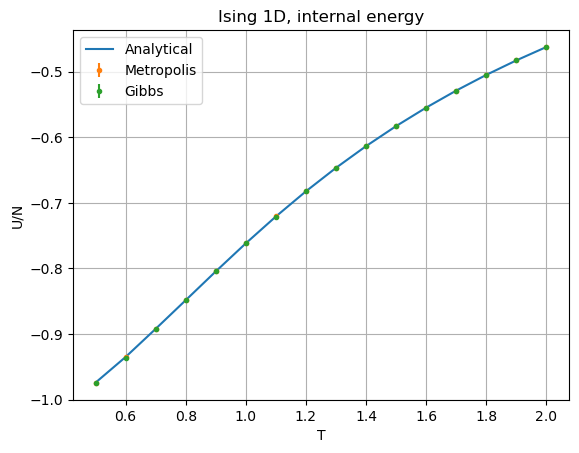

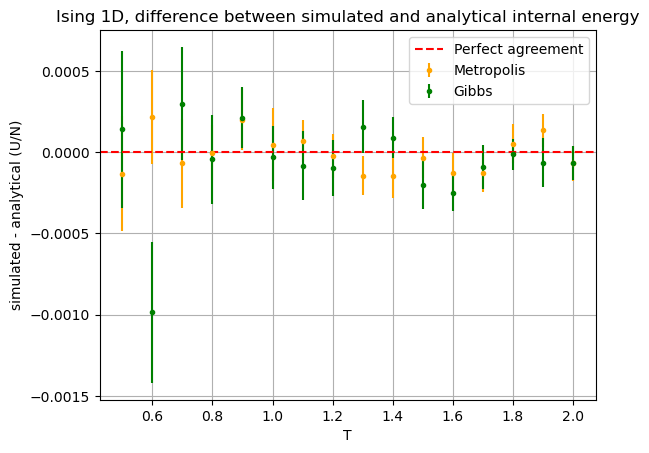

In [2]:
points=16
T = np.linspace(2.0, 0.5,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

ene_metro_raw = np.loadtxt("ene_metro.out")
ene_metro_data = ene_metro_raw[19::20]
ene_metro = ene_metro_data[:, 2]
ene_metro_err = ene_metro_data[:, 3]

ene_gibbs_raw = np.loadtxt("ene_gibbs.out")
ene_gibbs_data = ene_gibbs_raw[19::20]
ene_gibbs = ene_gibbs_data[:, 2]
ene_gibbs_err = ene_gibbs_data[:, 3]


plt.plot(T, e, label='Analytical')
plt.errorbar(T, ene_metro, yerr = ene_metro_err, fmt = '.', label='Metropolis')
plt.errorbar(T, ene_gibbs, yerr = ene_gibbs_err, fmt = '.', label='Gibbs')
plt.xlabel('T')
plt.ylabel('U/N')
plt.title('Ising 1D, internal energy')
plt.legend()
plt.grid(True)
plt.show()

diff_ene_metro = ene_metro-e
diff_ene_gibbs = ene_gibbs-e

plt.errorbar(T, diff_ene_metro, yerr = ene_metro_err, fmt = '.', color = 'orange',label='Metropolis')
plt.errorbar(T, diff_ene_gibbs, yerr = ene_gibbs_err, fmt = '.', color = 'g', label='Gibbs')
plt.xlabel('T')
plt.ylabel('simulated - analytical (U/N)')
plt.title('Ising 1D, difference between simulated and analytical internal energy')
plt.axhline(y=0.0, color='r', linestyle='--', label='Perfect agreement')
plt.legend()
plt.grid(True)
plt.show()



**Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

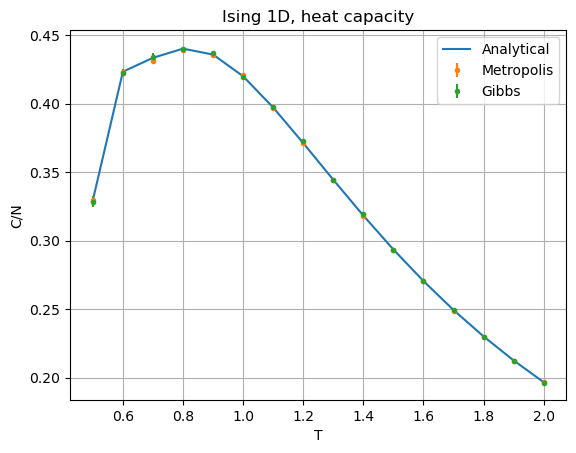

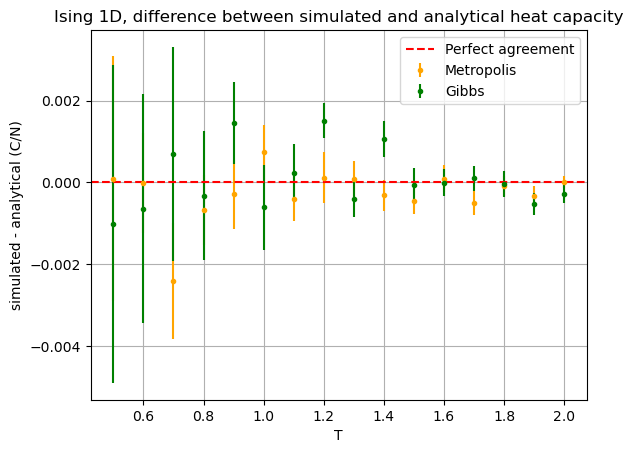

In [3]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)


heat_metro_raw = np.loadtxt("heat_metro.out")
heat_metro_data = heat_metro_raw[19::20]
heat_metro = heat_metro_data[:, 2]
heat_metro_err = heat_metro_data[:, 3]

heat_gibbs_raw = np.loadtxt("heat_gibbs.out")
heat_gibbs_data = heat_gibbs_raw[19::20]
heat_gibbs = heat_gibbs_data[:, 2]
heat_gibbs_err = heat_gibbs_data[:, 3]


plt.plot(T, heat, label='Analytical')
plt.errorbar(T, heat_metro, yerr = heat_metro_err, fmt = '.', label='Metropolis')
plt.errorbar(T, heat_gibbs, yerr = heat_gibbs_err, fmt = '.', label='Gibbs')
plt.xlabel('T')
plt.ylabel('C/N')
plt.title('Ising 1D, heat capacity')
plt.legend()
plt.grid(True)
plt.show()

diff_heat_metro = heat_metro-heat
diff_heat_gibbs = heat_gibbs-heat

plt.errorbar(T, diff_heat_metro, yerr = heat_metro_err, fmt = '.', color = 'orange',label='Metropolis')
plt.errorbar(T, diff_heat_gibbs, yerr = heat_gibbs_err, fmt = '.', color = 'g', label='Gibbs')
plt.xlabel('T')
plt.ylabel('simulated - analytical (C/N)')
plt.title('Ising 1D, difference between simulated and analytical heat capacity')
plt.axhline(y=0.0, color='r', linestyle='--', label='Perfect agreement')
plt.legend()
plt.grid(True)
plt.show()

**Magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

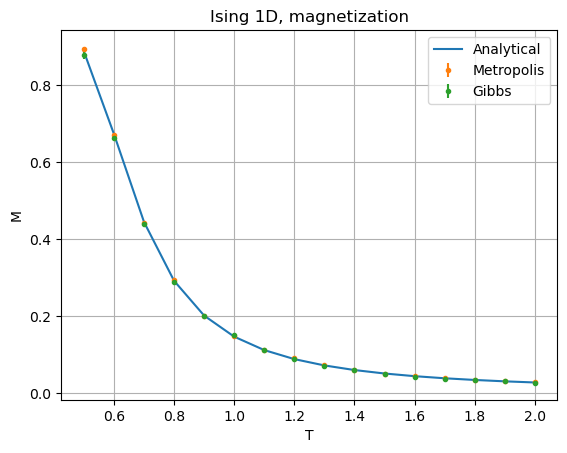

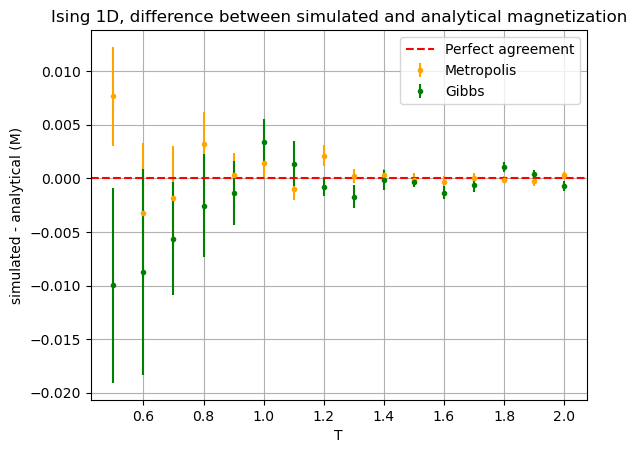

In [4]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


mag_metro_raw = np.loadtxt("mag_metro.out")
mag_metro_data = mag_metro_raw[19::20]
mag_metro = mag_metro_data[:, 2]
mag_metro_err = mag_metro_data[:, 3]

mag_gibbs_raw = np.loadtxt("mag_gibbs.out")
mag_gibbs_data = mag_gibbs_raw[19::20]
mag_gibbs = mag_gibbs_data[:, 2]
mag_gibbs_err = mag_gibbs_data[:, 3]


plt.plot(T, M, label='Analytical')
plt.errorbar(T, mag_metro, yerr = mag_metro_err, fmt = '.', label='Metropolis')
plt.errorbar(T, mag_gibbs, yerr = mag_gibbs_err, fmt = '.', label='Gibbs')
plt.xlabel('T')
plt.ylabel('M')
plt.title('Ising 1D, magnetization')
plt.legend()
plt.grid(True)
plt.show()

diff_mag_metro = mag_metro-M
diff_mag_gibbs = mag_gibbs-M

plt.errorbar(T, diff_mag_metro, yerr = mag_metro_err, fmt = '.', color = 'orange',label='Metropolis')
plt.errorbar(T, diff_mag_gibbs, yerr = mag_gibbs_err, fmt = '.', color = 'g', label='Gibbs')
plt.xlabel('T')
plt.ylabel('simulated - analytical (M)')
plt.title('Ising 1D, difference between simulated and analytical magnetization')
plt.axhline(y=0.0, color='r', linestyle='--', label='Perfect agreement')
plt.legend()
plt.grid(True)
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

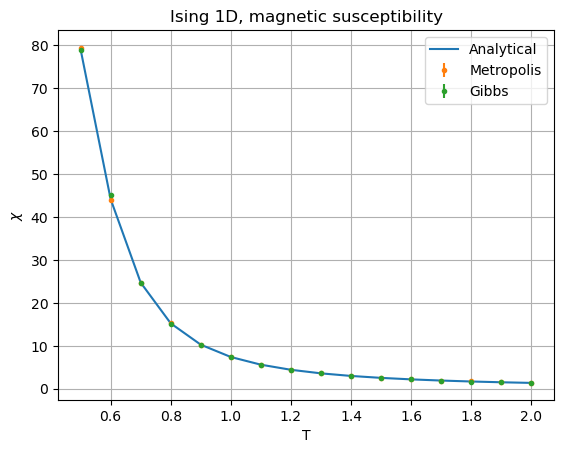

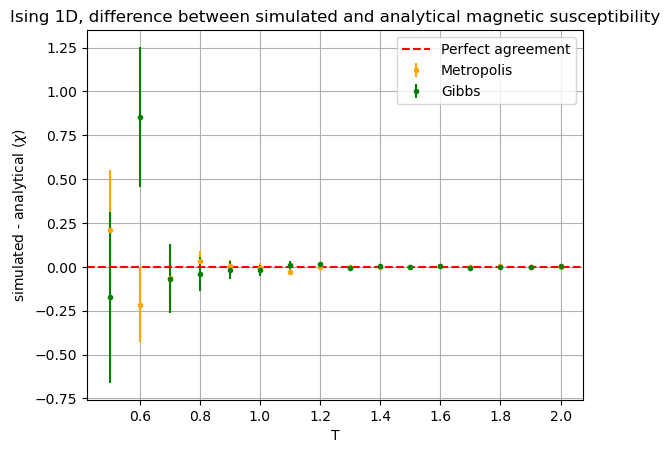

In [5]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

chi_metro_raw = np.loadtxt("chi_metro.out")
chi_metro_data = chi_metro_raw[19::20]
chi_metro = chi_metro_data[:, 2]
chi_metro_err = chi_metro_data[:, 3]

chi_gibbs_raw = np.loadtxt("chi_gibbs.out")
chi_gibbs_data = chi_gibbs_raw[19::20]
chi_gibbs = chi_gibbs_data[:, 2]
chi_gibbs_err = chi_gibbs_data[:, 3]


plt.plot(T, X, label='Analytical')
plt.errorbar(T, chi_metro, yerr = chi_metro_err, fmt = '.', label='Metropolis')
plt.errorbar(T, chi_gibbs, yerr = chi_gibbs_err, fmt = '.', label='Gibbs')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.title('Ising 1D, magnetic susceptibility')
plt.legend()
plt.grid(True)
plt.show()

diff_chi_metro = chi_metro-X
diff_chi_gibbs = chi_gibbs-X

plt.errorbar(T, diff_chi_metro, yerr = chi_metro_err, fmt = '.', color = 'orange',label='Metropolis')
plt.errorbar(T, diff_chi_gibbs, yerr = chi_gibbs_err, fmt = '.', color = 'g', label='Gibbs')
plt.xlabel('T')
plt.ylabel('simulated - analytical ($\chi$)')
plt.title('Ising 1D, difference between simulated and analytical magnetic susceptibility')
plt.axhline(y=0.0, color='r', linestyle='--', label='Perfect agreement')
plt.legend()
plt.grid(True)
plt.show()

### Comments

- The simulation was performed starting from $T = 2$ and decreasing the temperature by $\delta T = 0.1$ every run. Of course equilibration is needed before the first run, but not between two consecutive runs, as it turns out ($\Delta T$ is small enough). The simulation was performed with $h = 0$ to collect data on internal energy, heat capacity and magnetic susceptibility and with $h = 0.02$ to collect data on magnetization.

- The estimations of all physical observables at lower temperatures are associated to higher variance.

- Both Gibbs and Metropolis samplings yield results that are in perfect agreement with analytic calculations, without notable differences.